In [7]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
%matplotlib inline

iris = load_iris()
X = iris.data[:, :2]  # Only first two features for visualization
y = iris.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42
)

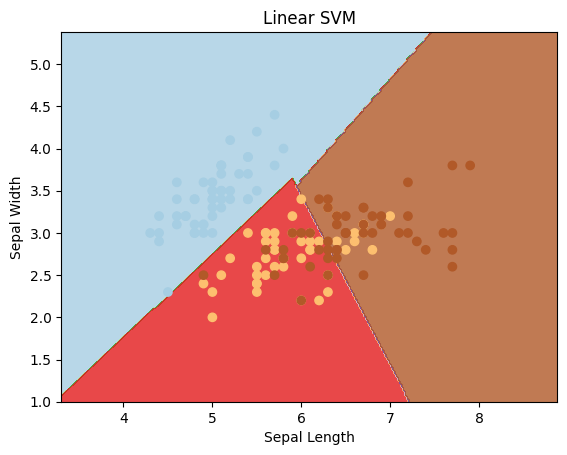

In [ ]:
clf_linear = SVC(kernel='linear')
clf_linear.fit(X, y)

h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
                     
# Plot decision boundary of Linear SVM
Z_linear = clf_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z_linear = Z_linear.reshape(xx.shape)
plt.contourf(xx, yy, Z_linear, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title('Linear SVM')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

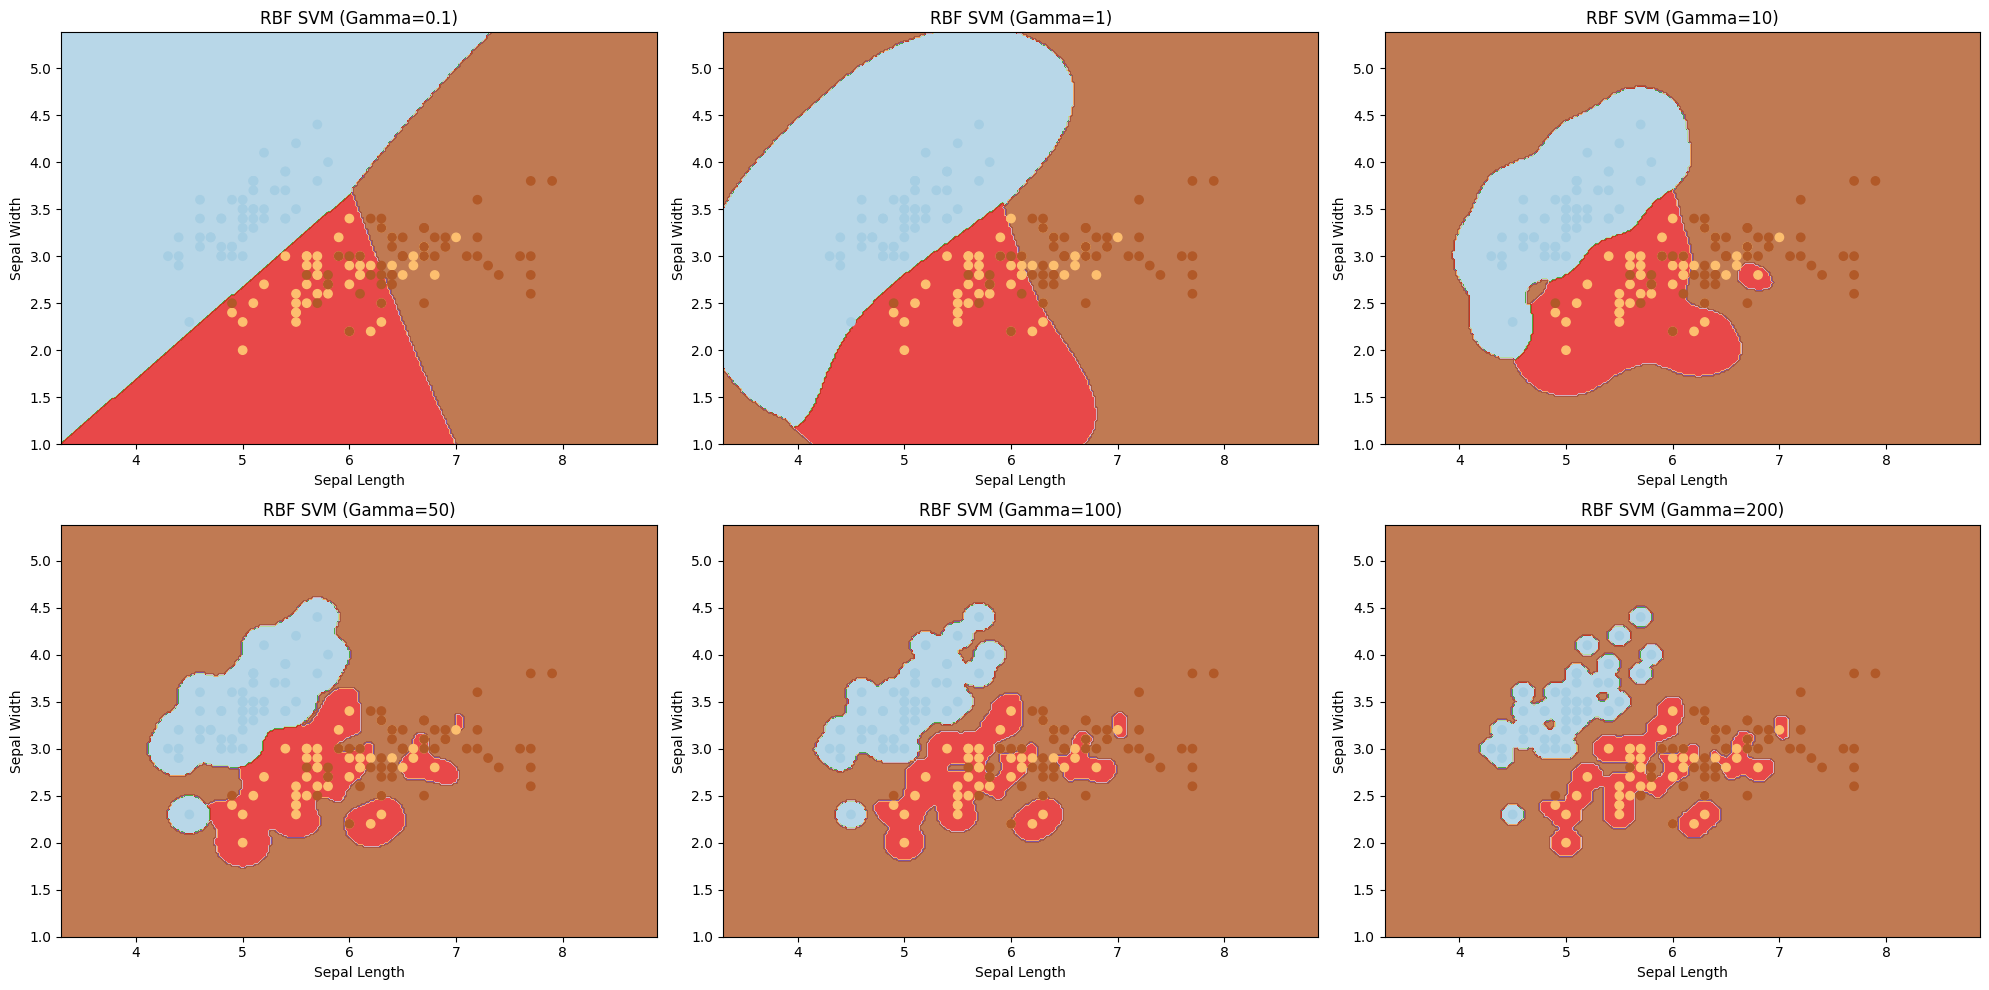

In [10]:
gamma_values = [0.1, 1, 10, 50, 100, 200]

plt.figure(figsize=(20, 10))
for i, gamma in enumerate(gamma_values, 1):
    # Train SVM with RBF kernel
    clf_rbf = SVC(kernel='rbf', gamma=gamma)
    clf_rbf.fit(X, y)

    # Create a mesh to plot decision boundaries
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

    # Plot decision boundary
    plt.subplot(2, 3, i)
    Z_rbf = clf_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_rbf = Z_rbf.reshape(xx.shape)
    plt.contourf(xx, yy, Z_rbf, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.title(f'RBF SVM (Gamma={gamma})')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

plt.tight_layout()
plt.show()